$\def\com#1{\color{blue}{\textrm{#1}}}$
$\com{Marker's comments will appear like this}$

$$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>

# Laboratory 4

# A. Damped, driven, simple harmonic oscillator
In the lectures we discussed the signficance of the damped, driven, simple harmonic oscillator as a model of a two-level atom driven by a laser, or a mass on a spring, or a superconducting Josephson junction, or a series RLC circuit, or a rotating disc mass attached to an axial pin, or ...

The importance of the system can't be overstated. We will study it in part A of this lab.

# Reduction to first order
In Lecture 7 we discussed the reduction of second order systems of ODEs to first order. We consider here a mass $m$ on a spring, with damping rate $\gamma$. The spring constant $k$ combined with the mass $m$ give an oscillator with angular frequency $\omega=\sqrt{k/m}$. 

In standard form, the second order equation of motion is

$$\ale{
\frac{d^2x}{dt^2}+\frac{\gamma}{2}\frac{dx}{dt}+\omega^2x=f(t).
}$$

where the driving $f(t)$ has physical dimensions of force per unit mass.

Doing the reduction to first order, we have $v\equiv dx/dt$, and the coupled equations

$$\ale{
\frac{dx}{dt}&=v\\
\frac{dv}{dt}&=-\gamma/2 v - \omega^2 x + f(t)
}$$

or, in vector form

$$\ale{
\frac{d\mathbf{X}}{dt}&=\mathbf{L}\mathbf{X}+\mathbf{F}(t)
}$$

with 

$$\mathbf{X}=\begin{bmatrix}
    x    \\
    v
\end{bmatrix},\quad\quad
\mathbf{L}= \begin{bmatrix}
0 & 1 \\
-\omega^2 & -\gamma/2
\end{bmatrix},\quad\quad \mathbf{F}(t)=\begin{bmatrix}
    0    \\
    f(t)
\end{bmatrix}
$$

In this first order form we can pass the problem to `DifferentialEquations` for numerical integration, for any choice of parameters.

In each of the systems mentioned above there is an equivalent of the variable $x$ that is oscillating, the damping constant $\gamma$, the natural frequency of vibration $\omega$, and the forcing $f(t)$.

1. Set up the required functions and parameters to solve the equation of motion using `DifferentialEquations.jl`, including a forcing function $f(t)=a\sin w t$. Use the parameters $\omega=\pi, \gamma=0.1, a=0.2, w = 1.0$.
2. Solve the equation of motion up to the final time $20/\gamma$, and plot a well-labeled graph showing the solution for $x(t)$ as a function of time.
3. Identify a time interval where the motion has settled down to a steady state oscillation, and extract the maximum displacement of the mass $x_m$. This gives an indication of how effectively the driving force is feeding energy into the oscillator in the steady state.
4. Solve the equations of motion for a suitably chosen range of $w$ around $\omega$, and for each solution, find $x_m$. Plot a well-labelled graph of $x_m$ versus $w$, and interpret your result.
5. Repeat step 4 for a range of damping values $\gamma\in\Gamma\equiv[0.05, 0.1, 0.2, 0.3]$, and plot $x_m(w)$ for each, on the same graph. How does the damping strength change the response of the oscillator to the drive?

the maximum displacement once it has settled is 0.02620300747099024

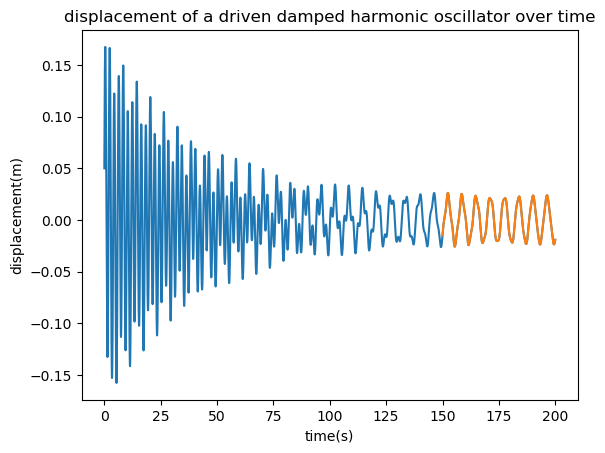

In [1]:
#Question A 1-3
using DifferentialEquations, PyPlot, Formatting
ω = pi
γ = 0.1
a = 0.2
w = 1

function F(t)
    F=a*sin(w*t)
    return F
end

function lab4_osc(du,u,p,t)
    du[1] = u[2]
    du[2] = -(γ/2)*u[2] - ω^2*u[1] + F(t)
end

tspan = (0.0,20/γ)
t = collect(0:0.01:20/γ)
u0 = [0.05,0.5]
    
    
prob = ODEProblem(lab4_osc,u0,tspan)
sol = solve(prob,saveat=t)
plot(t,sol[1,:])
xlabel("time(s)")
ylabel("displacement(m)")
title("displacement of a driven damped harmonic oscillator over time")

#Now finding maximum.. QA3
tlen = size(t)[1]
#taking the last quarter of the solution and finding the max
tclip = [t[x] for x in Int(round(tlen*0.75)):Int(tlen)]
solclip = [sol[1,x] for x in Int(round(tlen*0.75)):Int(tlen)]
plot(tclip,solclip)
x_m = maximum(solclip)
printfmt("the maximum displacement once it has settled is {}", x_m)

The maximum displacement is defined as being very small except in those cases where the driving frequency is close to the natural frequency, in which case it becomes very large. This is what one would expect, as when the natural frequency is close to the driving frequency the system can absorb the maximum amount of energy from the driving force and reach a large amplitude.

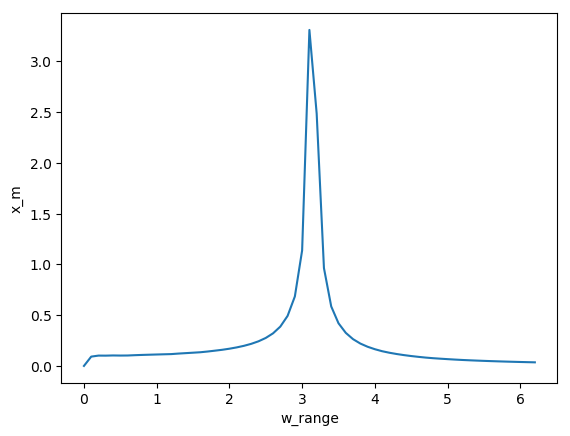

PyObject <matplotlib.text.Text object at 0x7f4f92f0eed0>

In [2]:
#Question A4
using DifferentialEquations, PyPlot

#iterating over a number of different ω, seeing how it changes x_m
ω = pi
w_range = 0:0.1:(2*ω)
x_m = zeros(length(w_range))
count = 0
γ = 0.1
a = 1

for i in w_range
count += 1
w = i

F(t) = a*sin(w*t)
    
function lab4_osc(du,u,p,t)
    du[1] = u[2]
    du[2] = -(γ/2)*u[2] - ω^2*u[1] + F(t)
end
#solving ODE
tspan = (0.0,20/γ)
t = collect(0:0.01:20/γ)
u0 = [0.05,0.5]
prob = ODEProblem(lab4_osc,u0,tspan)
sol = solve(prob,saveat=t)
    
#taking the last few periods of the solution to ensure it has settled... finding the max
tlen = size(t)[1]
tclip = [t[x] for x in Int(round(tlen*0.95)):Int(tlen)]
solclip = [sol[1,x] for x in Int(round(tlen*0.95)):Int(tlen)]
x_m[count]= maximum(solclip)
end

plot(w_range, x_m)
xlabel("w_range")
ylabel("x_m")

In [ ]:
#Question A5
using DifferentialEquations, PyPlot

#iterating over a number of different ω, seeing how it changes x_m
#also changing damping force..
for i = [0.05, 0.1, 0.2, 0.3]
ω = pi
w_range = 0.02:0.01:(4*ω)
x_m = zeros(length(w_range))
count = 0
γ = i
a = 0.2

for j in w_range
count += 1
w = j

F(t) = a*sin(w*t)
        
function lab4_osc(du,u,p,t)
    du[1] = u[2]
    du[2] = -(γ/2)*u[2] - ω^2*u[1] + F(t)
end
        
#solving ODE
tspan = (0.0,20/γ)
t = collect(0:0.01:20/γ)
u0 = [0.05,0.5]
prob = ODEProblem(lab4_osc,u0,tspan)
sol = solve(prob,saveat=t)

#taking the last quarter of the solution and finding the max
tlen = size(t)[1]
tclip = [t[x] for x in Int(round(tlen*0.75)):Int(tlen)]
solclip = [sol[1,x] for x in Int(round(tlen*0.75)):Int(tlen)]
x_m[count]= maximum(solclip)
end

plot(w_range, x_m)
xlabel("w_range")
ylabel("x_m")
xlim([2,4])
end
legend([L"gamma = 0.05",L"gamma = 0.1",L"gamma = 0.2",L"gamma=0.3"]);
show()

As the damping strength increases, it reduces the maximum x_m that the oscillator can acheive when the driving force is in resonance with the oscillator's natural frequency.

$\com{A plot of $x_m$ for different values of $\gamma$ would be very helpful !}$

The [Burj Khalifa](https://en.wikipedia.org/wiki/Burj_Khalifa) has 163 floors, reaching 830m. Such extended structures are highly vulnerable to weather and ground vibrations. 

<div style="width: 500px;"> 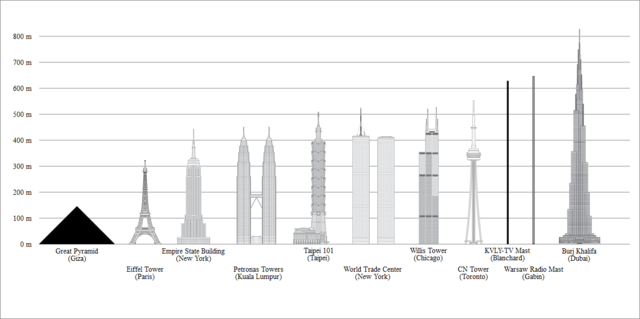</div>

Our task is to create a realistic model of a tall building as a chain of coupled masses, subject to driving and damping. 

# The model 
Consider the equation of motion for the $n$-th mass in the chain, governed by Newton's laws. We will assume all masses $m$ and spring constants $k$ are equal.

## Parameters
- $k$ spring constant
- $m$ mass of each floor 
- $\gamma$ damping
- $x_n$ displacement of floor $n$ from equilibrium (vertical) position

## Equation of motion: Hooke's law 
For mass $n$ in the middle of the chain:

$$m\frac{d^2x_n}{dt^2}=-k(x_{n}-x_{n+1})-k(x_{n}-x_{n-1})\tag{Newton II}$$

Note that each mass has **two** restoring forces of the Hooke type, both depending on the **relative displacement** of mass $n$ from mass $n-1$ and $n+1$. We will also include a damping term that depends on the **relative velocity** of neighbouring masses, to give the complete model without driving as

$$\frac{d^2x_n}{dt^2}=-\omega^2(x_{n}-x_{n+1})-\omega^2(x_{n}-x_{n-1})-\gamma(\dot{x}_n-\dot{x}_{n-1})-\gamma(\dot{x}_{n+1}-\dot{x}_{n})$$

where $\omega=\sqrt{k/m}$ is the natural frequency of each mass. 

Reduction to first order gives $2N$ equations
<div class="alert alert-block alert-warning">
<font color=blue>
\begin{align}
\frac{dx_n}{dt}&=v_n\\
\frac{dv_n}{dt}&=-\omega^2(2x_{n}-x_{n+1}-x_{n-1})-\gamma(2v_{n}-v_{n+1}-v_{n-1})
\end{align}
    </font>
</div>

Our general problem then involves solving for a column vector of $2N$ unknowns ${\bf X}=[x_1\dots x_n\dots x_N,v_1\dots v_n\dots v_N]^T$, obeying the linear equation of motion

$$\frac{d{\bf X}}{dt}={\bf L}{\bf X}+{\bf F}(t),$$

where the forcing ${\bf F(t)}$ is yet to be determined.
For our particular system the matrix ${\bf L}$ is of block form

$${\bf L}\equiv\begin{bmatrix}
    0_N & I_N  \\
        -\omega^2 A & -\gamma A
\end{bmatrix},
$$

where the matrix $A$ will need to be constructed.

**1.** Set up the functions required to solve the problem using `DifferentialEquations.jl`. You will need to take care when setting the boundary conditions determined by the first and last rows of $A$.

**2.** Use the parameters $\omega=\pi, N=300, \gamma=0$. Solve the equations of motion for the initial condition $x_1(0)=1.0$, $x_2(0)=x_3(0)=\cdots x_N(0)\equiv 0,$ and $v_j(0)\equiv 0$ for all $j$. This corresponds to an instant transverse shock applied to the end mass at $t=0$. Solve the EOM up until $t=t_f\equiv 600$. Plot a graph of $\mathbf{X}(t)$, and use `Interact.jl` to enable you to scan through the solution as a function of time.

**3.** Measure (you can do this just by reading it off your graphs) a speed for the leading edge of the pulse as it travels along the mass chain. Is this what you expect? Assume your masses are a distance 1.0 apart. 

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 301 Int64 , "T", 301, "301", 301, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(288=>"288",306=>"306",520=>"520",11=>"11",491=>"491",134=>"134",158=>"158",160=>"160",215=>"215",464=>"464"…)), Any[], Any[], true, "horizontal", true)

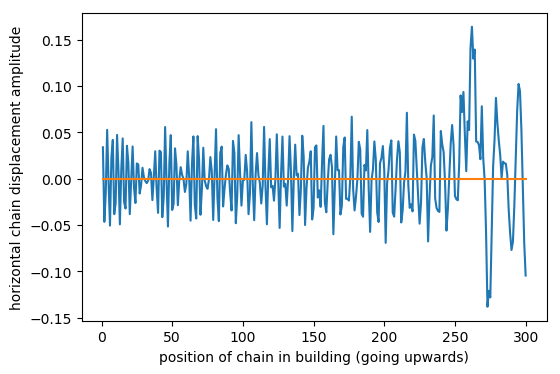

In [2]:
#Question B 1,2
using DifferentialEquations, PyPlot, Interact

#N is the number of oscillators... 
N = 300
ω = pi
γ = 0.0
a = 0.2
b = 0.1
Ω = pi/2

#Making A...
A = 2*eye(N);
A -= diagm(ones(N-1),-1);
A -= diagm(ones(N-1),1);
A[1,1] = 1.0; 
A[N,N] = 1.0

L=[zeros(N,N) eye(N,N); -ω^2.*A -γ.*A]

function lab4_osc(du,u,p,t)
    du .= L*u
end

f1 = figure(figsize=(6,4))
t = collect(0.0:1.0:600.0)
chain_num = collect(1:N)

@manipulate for T in eachindex(t) withfig(f1,clear=true) do
        trange = (0.0,600.0)
        t = collect(0.0:1.0:600.0)
        u0 = zeros(2N)
        u0[1] = 1.0
        prob = ODEProblem(lab4_osc,u0,trange)
        sol = solve(prob,saveat=t)
        chain_sol = sol[1:N,T]
        plot(chain_num,chain_sol)
        plot(chain_num,0*chain_num)
        xlabel("position of chain in building (going upwards)")
        ylabel("horizontal chain displacement amplitude")
    end
end


#Question B3.

The speed of the transverse impule is roughly 3 oscillator chains per second. This is what you would expect as the frequency, $\pi$ is $\approx 3$, and we know from the dispersion relation that $c = \omega_o * \Delta y$, where $\Delta y$ is defined to be one.

$\com{Good !}$

# Driving and damping
We can model an earthquake by driving the mass chain from one end.
To do this, we need to change the boundary condition from free to hard wall, and then make the wall move. In practice, this means that mass 1 has a spring coupling it to the ground floor, mass 0. The ground floor is not a degree of freedom to solve for, it will be the source of our driving force.

Returning to our equation of motion, let's consider $x_1$, including now its coupling to $x_0$:

$$\frac{d^2x_1}{dt^2}=-\omega^2(x_{1}-x_{2})-\omega^2(x_{1}-x_{0})-\gamma(\dot{x}_1-\dot{x}_{0})-\gamma(\dot{x}_{2}-\dot{x}_{1})$$

and we will assume a simple form for the ground motion: 

$$x_0(t)=b\sin\Omega t$$

Then apparently our first floor equation of motion becomes

$$\frac{d^2x_1}{dt^2}=-\omega^2(x_{1}-x_{2})-\omega^2(x_{1}-b\sin\Omega t)-\gamma(\dot{x}_1-\Omega b\cos\Omega t)-\gamma(\dot{x}_{2}-\dot{x}_{1})$$

In other words, we can write this in first order form as

$$\ale{\frac{dx_1}{dt}&=v_1\\
\frac{dv_1}{dt}&=-\omega^2(2x_{1}-x_{2})-\gamma(2v_1-v_1)+\omega^2b\sin\Omega t+\gamma\Omega b\cos\Omega t}$$
where the last expressions are the forcing terms.

**4.** Add the forcing and damping terms to the numerical model, initially setting $\gamma=0.05, b=0.1, \Omega=\pi/2$. You will need to change the boundary condition for $x_1$ by altering the coupling matrix $A$.

**5.** Find a parameter regime where your driving creates a clear periodic travelling wave with a wide region of constant amplitude. Find the speed of regular plane waves as a function of driving frequency for long wavelength waves (again, just read off your graphs). Is it related to $k$ as you expect?

**6.** What happens to the energy travelling up the building as damping is increased? How would you engineer the building to be earthquake resistant?

Interact.Options{:SelectionSlider,Int64}(29: "input-8" = 51 Int64 , "T", 51, "51", 51, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)), Any[], Any[], true, "horizontal", true)

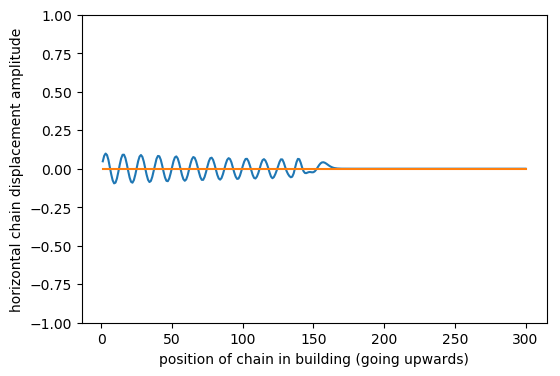

In [10]:
#Question B 4
using DifferentialEquations, PyPlot, Interact

#N is the number of oscillators... 
N = 300
ω = pi
γ = 0.1
b = 0.1
Ω = pi/2

#Making A...
A = 2*eye(N);
A -= diagm(ones(N-1),-1);
A -= diagm(ones(N-1),1);
A[1,1] = 2.0
A[end,end] = 1.0

L=[zeros(N,N) eye(N,N); -ω^2.*A -γ.*A]
drive(t) = ω^2*b*sin(Ω*t) + γ*Ω*b*cos(Ω*t)

function lab4_osc(du,u,p,t)
    du .= L*u + [zeros(N);drive(t);zeros(N-1)]
end

f1 = figure(figsize=(6,4))
t = collect(0.0:1.0:100.0)
chain_num = collect(1:N)

@manipulate for T in eachindex(t) withfig(f1,clear=true) do
        trange = (0.0,100.0)
        t = collect(0.0:1.0:100.0)
        u0 = zeros(2N)
        u0[1] = 1.0
        prob = ODEProblem(lab4_osc,u0,trange)
        sol = solve(prob,saveat=t)
        chain_sol = sol[1:N,T]
        plot(chain_num,chain_sol)
        plot(chain_num,0*chain_num)
        ylim([-1,1])
        xlabel("position of chain in building (going upwards)")
        ylabel("horizontal chain displacement amplitude")
    end
end

$\com{The plot range of y-axis could be smaller such that we can see the changes of horizontal displacement by eyes.}$

Interact.Options{:SelectionSlider,Int64}(37: "input-10" = 51 Int64 , "T", 51, "51", 51, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)), Any[], Any[], true, "horizontal", true)

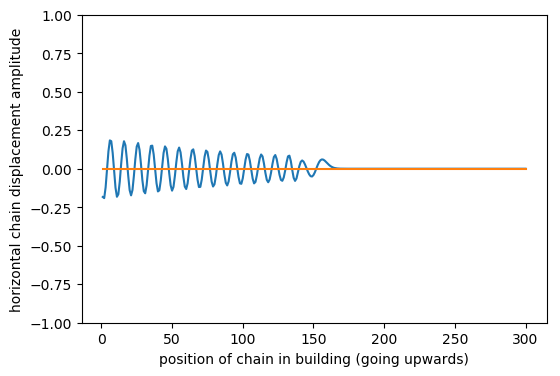

In [12]:
#Question B5
#Trying to find a parameter regime where you can see a clear travelling wave
using DifferentialEquations, PyPlot, Interact

#N is the number of oscillators... 
N = 300
ω = pi
#gamma is damping
γ = 0.1
#b is forcing amplitude
b = 0.2
Ω = 2

#Making A...
A = 2*eye(N);
A -= diagm(ones(N-1),-1);
A -= diagm(ones(N-1),1);
A[1,1] = 2.0
A[end,end] = 1.0

L=[zeros(N,N) eye(N,N); -ω^2.*A -γ.*A]
drive(t) = ω^2*b*sin(Ω*t) + γ*Ω*b*cos(Ω*t)

function lab4_osc(du,u,p,t)
    du .= L*u + [zeros(N);drive(t);zeros(N-1)]
end

f1 = figure(figsize=(6,4))
t = collect(0.0:1.0:100.0)
chain_num = collect(1:N)

@manipulate for T in eachindex(t) withfig(f1,clear=true) do
        trange = (0.0,100.0)
        t = collect(0.0:1.0:100.0)
        u0 = zeros(2N)
        u0[1] = 1.0
        prob = ODEProblem(lab4_osc,u0,trange)
        sol = solve(prob,saveat=t)
        chain_sol = sol[1:N,T]
        plot(chain_num,chain_sol)
        plot(chain_num,0*chain_num)
        ylim([-1,1])
        xlabel("position of chain in building (going upwards)")
        ylabel("horizontal chain displacement amplitude")
    end
end

Now using the long wavelength approximation for the dispersion relation..

We know $c = \omega_o * \Delta y$. Here our $\omega_o = \pi$ and our $\Delta y = 1$ as given in the lab notes. So our speed should be roughly equal to $\pi$. Stepping the equation forward in time using interact.jl we see that this is the case. We can also check that it is independant of $\kappa$. This should be the case because the natural frequency of the building is a property of the material while $\kappa$ is proportional to the frequency of the driving force. In other words, $\omega$ determines how fast the disturbence travels through the building, while $\kappa$ determines how bunched up the disturbance waves are and their amplitudes.

We can vary $\kappa$ by changing $\Omega$ and checking that c stays the same.

$\Omega$ = 1, at T = 91, it reaches 300m so c = 300/91 = 3.29 $\approx$ $\pi$

Now
$\Omega$ = 2, at T = 91 it reaches 300m as before.

So we can see that varying $\Omega$ does not effect c. So c is not affected by the change in $\kappa$, as one would expect in the long wavelength approximation regime.

6.
The energy travelling down the building is dissapated as the damping is increased. Thus to make the building more resistant to earthquakes according to this model we must increase the damping of the building system. There could be many ways to do this... One could increase the amount of damping that the building experiences due to sliding friction for example.

$\com{Good !  13/15}$